## SGD(확률적 경사 하강법)

In [ ]:
class SGD:
    def __init__(self,lr=0.01):
        self.lr=lr
        return
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= grads[key]*self.lr
            
        return

In [37]:
import numpy as np
import matplotlib.pyplot as plt

## Momentum(모맨텀)

In [2]:
class Momentum:
    def __init__(self,lr=0.01,momentum=0.9):
        self.lr=lr
        slef.momentum=momentum
        self.v=None
        return
    def update(self,params,grads):
        if self.v is None:
            self.v={}
            for key,val in params.items():
                self.v[key]= np.zeros.like(val)
                
            
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]
        

## AdaGrad
#### 학습률을 각 매개변수에 맞춰서 값을 서서히 줄여준다.

In [79]:
class AdaGrad:
    def __init__(self,lr=0.01):
        self.lr=lr
        self.h=None
        return
    def update(self,params,grads):
        if self.h is None:
            self.h={}
            for key,val in parms.items():
                self.h[key] = np.zeros.like(val)
                
        for key in params.keys():
            self.h[key] += (grads[key] * grads[key])
            params[key] -= self.lr* (grads[key]/ np.sqrt(self.h[key] + 1e-7) )

## Adam
#### Momentum + AdaGrad : 각 매개변수 기울기에 가속도를 부여한 후, 알맞게 학습률을 조정

## Compare optimizor using mnist

===========iteration:0===========
SGD:2.3510460641343025
Momentum:2.3972773729142727
AdaGrad:1.9737007027025462
Adam:2.2009982604556284
===========iteration:100===========
SGD:1.644354533928067
Momentum:0.32644568498977944
AdaGrad:0.20597215709979871
Adam:0.2526531407349053
===========iteration:200===========
SGD:0.949157816881109
Momentum:0.3832988810468468
AdaGrad:0.15041041029674254
Adam:0.3323496330051528
===========iteration:300===========
SGD:0.5212427163884991
Momentum:0.1435922780500074
AdaGrad:0.0627953403330119
Adam:0.06994814229642002
===========iteration:400===========
SGD:0.5494911553274644
Momentum:0.45232595493536903
AdaGrad:0.1959583846824155
Adam:0.36177820954513146
===========iteration:500===========
SGD:0.2551520181094753
Momentum:0.054988192058410046
AdaGrad:0.0282875753771068
Adam:0.03415125315160199
===========iteration:600===========
SGD:0.3897070462153289
Momentum:0.1793683561909768
AdaGrad:0.054770258448250134
Adam:0.11376125112538844
===========iteration:700==

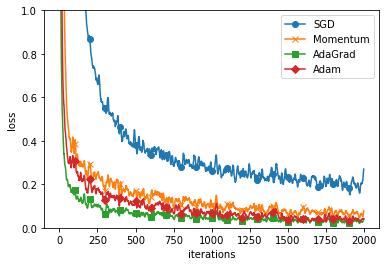

In [80]:
# coding: utf-8
import os
import sys
sys.path.append(os.curdir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()
